In [1]:
import torch
from IPython import display
import torchvision
from torch.utils import data
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
"""knowhow --- IPython
IPython是一个python的交互式shell,比默认的python shell好用得多,支持变量自动补全,自动缩进,支持bash shell命令,内置了许多很有用的功能和函数。
同时它也是利用Python进行科学计算和交互可视化的一个最佳的平台。

1. IPython提供的两个主要组件
- 一个强大的python交互式shell 
- 供Jupyter notebooks使用的一个Jupyter内核(IPython notebook)

2. IPython的主要功能
- 运行ipython控制台 
- 使用ipython作为系统shell 
- 使用历史输入(history) 
- Tab补全 
- 使用%run命令运行脚本 
- 使用%timeit命令快速测量时间 
- 使用%pdb命令快速debug 
- 使用pylab进行交互计算 
- 使用IPython Notegong

3. IPython的使用
- 基础功能
    - Ctrl-p    或上箭头键 后向搜索命令历史中以当前输入的文本开头的命令
    - Ctrl-n    或下箭头键 前向搜索命令历史中以当前输入的文本开头的命令
    - Ctrl-r    按行读取的反向历史搜索（部分匹配）
    - Ctrl-shift-v   从剪贴板粘贴文本
    - Ctrl-c    中止当前正在执行的代码
    - Ctrl-a    将光标移动到行首
    - Ctrl-e    将光标移动到行尾
    - Ctrl-k    删除从光标开始至行尾的文本
    - Ctrl-u    清除当前行的所有文本译注12
    - Ctrl-f    将光标向前移动一个字符
    - Ctrl-b    将光标向后移动一个字符
    - Ctrl-l    清屏
- 高级功能
    TAB         自动补全
    ?           内省、命名空间搜索
    !           执行系统命令
    魔术命令%run,%paste,%timeit,%pda等
"""

'knowhow --- IPython\nIPython是一个python的交互式shell,比默认的python shell好用得多,支持变量自动补全,自动缩进,支持bash shell命令,内置了许多很有用的功能和函数。\n同时它也是利用Python进行科学计算和交互可视化的一个最佳的平台。\n\n1. IPython提供的两个主要组件\n- 一个强大的python交互式shell \n- 供Jupyter notebooks使用的一个Jupyter内核(IPython notebook)\n\n2. IPython的主要功能\n- 运行ipython控制台 \n- 使用ipython作为系统shell \n- 使用历史输入(history) \n- Tab补全 \n- 使用%run命令运行脚本 \n- 使用%timeit命令快速测量时间 \n- 使用%pdb命令快速debug \n- 使用pylab进行交互计算 \n- 使用IPython Notegong\n\n3. IPython的使用\n- 基础功能\n    - Ctrl-p    或上箭头键 后向搜索命令历史中以当前输入的文本开头的命令\n    - Ctrl-n    或下箭头键 前向搜索命令历史中以当前输入的文本开头的命令\n    - Ctrl-r    按行读取的反向历史搜索（部分匹配）\n    - Ctrl-shift-v   从剪贴板粘贴文本\n    - Ctrl-c    中止当前正在执行的代码\n    - Ctrl-a    将光标移动到行首\n    - Ctrl-e    将光标移动到行尾\n    - Ctrl-k    删除从光标开始至行尾的文本\n    - Ctrl-u    清除当前行的所有文本译注12\n    - Ctrl-f    将光标向前移动一个字符\n    - Ctrl-b    将光标向后移动一个字符\n    - Ctrl-l    清屏\n- 高级功能\n    TAB         自动补全\n    ?           内省、命名空间搜索\n    !           执行系统命令\n    魔术命令%run,%paste,%timeit,%pda等\n'

## 初始化模型参数
---

In [3]:
def load_data_fashion_mnist(batch_size, resize=None):
    """下载Fashion-MNIST数据集, 然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True
    )
    return (
        data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4),
        data.DataLoader(mnist_test, batch_size, shuffle=False, num_workers=4)
    )

In [4]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size)

In [5]:
num_inputs = 784
num_outputs = 10

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

## 定义softmax操作
---

In [6]:
def softmax(x):
    x_exp = torch.exp(x)
    return x_exp / torch.sum(x_exp, dim=1, keepdim=True)

## 定义模型
---

In [7]:
def net(x):
    return softmax(torch.matmul(x.reshape(-1, num_inputs), W)+b)

## 定义损失函数
---

In [8]:
def cross_entroy(y_hat, y):
    return -torch.log(y_hat[range(len(y_hat)), y])

In [9]:
"""example
y = torch.randn(20, 5)
z = torch.randint(0, 5, (20,))
y, z, y[range(len(y)), z], y[:, z]
"""
"""output
(tensor([[ 0.9568,  0.0165,  0.5633,  0.3450, -1.1059],
         [ 1.5407, -0.3733, -0.2387,  0.3086, -0.6114],
         [ 0.7368,  1.3331,  1.8366, -0.4504, -0.2660],
         [ 1.2109, -0.7283,  1.0464,  1.1585, -0.7540],
         [ 2.0568, -0.0037,  0.8874,  0.3056, -0.6380],
         [ 2.1674,  0.4144, -0.7552,  1.2589, -0.3872],
         [ 0.9762, -0.8907, -0.8214, -1.0713, -0.3745],
         [ 1.7990, -0.4993,  0.3134, -0.9953, -0.5868],
         [-0.4964, -0.8938, -1.8178,  1.0760,  1.3641],
         [ 0.4019, -0.0985,  1.1668,  1.2903,  0.8747],
         [ 1.4935,  0.4286, -0.2331, -0.1690, -1.0650],
         [-0.7906,  0.2829,  0.5133, -2.0722, -0.1678],
         [-0.0137,  0.4321, -1.1871,  0.9124, -1.4981],
         [-0.5089,  0.8068,  2.8300,  0.4376, -0.1408],
         [ 0.4557,  0.8142,  0.3764, -0.3519,  0.1430],
         [-0.8796, -0.3240,  0.1931, -0.1443, -0.8546],
         [-1.2208,  0.7864, -0.3126, -0.0674,  0.1372],
         [-0.8625,  1.2071, -1.1437, -0.4788, -0.0649],
         [ 0.9343,  1.5646, -1.2834,  0.8700,  1.7626],
         [ 1.1147,  1.7487,  1.3742,  0.2747, -0.1713]]),
 tensor([4, 3, 1, 3, 2, 4, 4, 1, 1, 2, 2, 3, 2, 2, 0, 1, 0, 1, 3, 4]),
 tensor([-1.1059,  0.3086,  1.3331,  1.1585,  0.8874, -0.3872, -0.3745, -0.4993,
         -0.8938,  1.1668, -0.2331, -2.0722, -1.1871,  2.8300,  0.4557, -0.3240,
         -1.2208,  1.2071,  0.8700, -0.1713]),
 tensor([[-1.1059,  0.3450,  0.0165,  0.3450,  0.5633, -1.1059, -1.1059,  0.0165,
           0.0165,  0.5633,  0.5633,  0.3450,  0.5633,  0.5633,  0.9568,  0.0165,
           0.9568,  0.0165,  0.3450, -1.1059],
         [-0.6114,  0.3086, -0.3733,  0.3086, -0.2387, -0.6114, -0.6114, -0.3733,
          -0.3733, -0.2387, -0.2387,  0.3086, -0.2387, -0.2387,  1.5407, -0.3733,
           1.5407, -0.3733,  0.3086, -0.6114],
         [-0.2660, -0.4504,  1.3331, -0.4504,  1.8366, -0.2660, -0.2660,  1.3331,
           1.3331,  1.8366,  1.8366, -0.4504,  1.8366,  1.8366,  0.7368,  1.3331,
           0.7368,  1.3331, -0.4504, -0.2660],
         [-0.7540,  1.1585, -0.7283,  1.1585,  1.0464, -0.7540, -0.7540, -0.7283,
          -0.7283,  1.0464,  1.0464,  1.1585,  1.0464,  1.0464,  1.2109, -0.7283,
           1.2109, -0.7283,  1.1585, -0.7540],
         [-0.6380,  0.3056, -0.0037,  0.3056,  0.8874, -0.6380, -0.6380, -0.0037,
          -0.0037,  0.8874,  0.8874,  0.3056,  0.8874,  0.8874,  2.0568, -0.0037,
           2.0568, -0.0037,  0.3056, -0.6380],
         [-0.3872,  1.2589,  0.4144,  1.2589, -0.7552, -0.3872, -0.3872,  0.4144,
           0.4144, -0.7552, -0.7552,  1.2589, -0.7552, -0.7552,  2.1674,  0.4144,
           2.1674,  0.4144,  1.2589, -0.3872],
         [-0.3745, -1.0713, -0.8907, -1.0713, -0.8214, -0.3745, -0.3745, -0.8907,
          -0.8907, -0.8214, -0.8214, -1.0713, -0.8214, -0.8214,  0.9762, -0.8907,
           0.9762, -0.8907, -1.0713, -0.3745],
         [-0.5868, -0.9953, -0.4993, -0.9953,  0.3134, -0.5868, -0.5868, -0.4993,
          -0.4993,  0.3134,  0.3134, -0.9953,  0.3134,  0.3134,  1.7990, -0.4993,
           1.7990, -0.4993, -0.9953, -0.5868],
         [ 1.3641,  1.0760, -0.8938,  1.0760, -1.8178,  1.3641,  1.3641, -0.8938,
          -0.8938, -1.8178, -1.8178,  1.0760, -1.8178, -1.8178, -0.4964, -0.8938,
          -0.4964, -0.8938,  1.0760,  1.3641],
         [ 0.8747,  1.2903, -0.0985,  1.2903,  1.1668,  0.8747,  0.8747, -0.0985,
          -0.0985,  1.1668,  1.1668,  1.2903,  1.1668,  1.1668,  0.4019, -0.0985,
           0.4019, -0.0985,  1.2903,  0.8747],
         [-1.0650, -0.1690,  0.4286, -0.1690, -0.2331, -1.0650, -1.0650,  0.4286,
           0.4286, -0.2331, -0.2331, -0.1690, -0.2331, -0.2331,  1.4935,  0.4286,
           1.4935,  0.4286, -0.1690, -1.0650],
         [-0.1678, -2.0722,  0.2829, -2.0722,  0.5133, -0.1678, -0.1678,  0.2829,
           0.2829,  0.5133,  0.5133, -2.0722,  0.5133,  0.5133, -0.7906,  0.2829,
          -0.7906,  0.2829, -2.0722, -0.1678],
         [-1.4981,  0.9124,  0.4321,  0.9124, -1.1871, -1.4981, -1.4981,  0.4321,
           0.4321, -1.1871, -1.1871,  0.9124, -1.1871, -1.1871, -0.0137,  0.4321,
          -0.0137,  0.4321,  0.9124, -1.4981],
         [-0.1408,  0.4376,  0.8068,  0.4376,  2.8300, -0.1408, -0.1408,  0.8068,
           0.8068,  2.8300,  2.8300,  0.4376,  2.8300,  2.8300, -0.5089,  0.8068,
          -0.5089,  0.8068,  0.4376, -0.1408],
         [ 0.1430, -0.3519,  0.8142, -0.3519,  0.3764,  0.1430,  0.1430,  0.8142,
           0.8142,  0.3764,  0.3764, -0.3519,  0.3764,  0.3764,  0.4557,  0.8142,
           0.4557,  0.8142, -0.3519,  0.1430],
         [-0.8546, -0.1443, -0.3240, -0.1443,  0.1931, -0.8546, -0.8546, -0.3240,
          -0.3240,  0.1931,  0.1931, -0.1443,  0.1931,  0.1931, -0.8796, -0.3240,
          -0.8796, -0.3240, -0.1443, -0.8546],
         [ 0.1372, -0.0674,  0.7864, -0.0674, -0.3126,  0.1372,  0.1372,  0.7864,
           0.7864, -0.3126, -0.3126, -0.0674, -0.3126, -0.3126, -1.2208,  0.7864,
          -1.2208,  0.7864, -0.0674,  0.1372],
         [-0.0649, -0.4788,  1.2071, -0.4788, -1.1437, -0.0649, -0.0649,  1.2071,
           1.2071, -1.1437, -1.1437, -0.4788, -1.1437, -1.1437, -0.8625,  1.2071,
          -0.8625,  1.2071, -0.4788, -0.0649],
         [ 1.7626,  0.8700,  1.5646,  0.8700, -1.2834,  1.7626,  1.7626,  1.5646,
           1.5646, -1.2834, -1.2834,  0.8700, -1.2834, -1.2834,  0.9343,  1.5646,
           0.9343,  1.5646,  0.8700,  1.7626],
         [-0.1713,  0.2747,  1.7487,  0.2747,  1.3742, -0.1713, -0.1713,  1.7487,
           1.7487,  1.3742,  1.3742,  0.2747,  1.3742,  1.3742,  1.1147,  1.7487,
           1.1147,  1.7487,  0.2747, -0.1713]]))
"""

'output\n(tensor([[ 0.9568,  0.0165,  0.5633,  0.3450, -1.1059],\n         [ 1.5407, -0.3733, -0.2387,  0.3086, -0.6114],\n         [ 0.7368,  1.3331,  1.8366, -0.4504, -0.2660],\n         [ 1.2109, -0.7283,  1.0464,  1.1585, -0.7540],\n         [ 2.0568, -0.0037,  0.8874,  0.3056, -0.6380],\n         [ 2.1674,  0.4144, -0.7552,  1.2589, -0.3872],\n         [ 0.9762, -0.8907, -0.8214, -1.0713, -0.3745],\n         [ 1.7990, -0.4993,  0.3134, -0.9953, -0.5868],\n         [-0.4964, -0.8938, -1.8178,  1.0760,  1.3641],\n         [ 0.4019, -0.0985,  1.1668,  1.2903,  0.8747],\n         [ 1.4935,  0.4286, -0.2331, -0.1690, -1.0650],\n         [-0.7906,  0.2829,  0.5133, -2.0722, -0.1678],\n         [-0.0137,  0.4321, -1.1871,  0.9124, -1.4981],\n         [-0.5089,  0.8068,  2.8300,  0.4376, -0.1408],\n         [ 0.4557,  0.8142,  0.3764, -0.3519,  0.1430],\n         [-0.8796, -0.3240,  0.1931, -0.1443, -0.8546],\n         [-1.2208,  0.7864, -0.3126, -0.0674,  0.1372],\n         [-0.8625,  1.

## 分类精度
---

In [10]:
def accuracy(y_hat, y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [11]:
class Accumulator:
    def __init__(self, n):
        self.data = [.0] * n
    def add(self, *args):
        self.data = [a+float(b) for a, b in zip(self.data, args)]
    def reset(self):
        self.data = [.0] * len(self.data)
    def __getitem__(self, i):
        return self.data[i]

In [12]:
def evaluate_accuracy(net, data_iter):
    """计算在指定数据集上模型的精度"""
    metric = Accumulator(2)
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [13]:
evaluate_accuracy(net, test_iter)

0.1499

## 训练
---

In [14]:
class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, xlim=None, ylim=None,
                xscale='linear', yscale='linear', legend=None,
                fmts=('-', 'm--', 'g-.', 'r:')):
        ## 增量地绘制多条线
        legend = [] if legend is None else legend
        self.fig, self.axes = plt.gcf(), plt.gca()
        self.config_axes = lambda: self.set_axes(xlabel, ylabel, xlim, ylim, xscale, yscale, legend) ## 使用lambda表达式捕获变量
        self.X, self.Y, self.fmts = None, None, fmts

    def set_axes(self, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
        self.axes.set_xlabel(xlabel)
        self.axes.set_ylabel(ylabel)
        self.axes.set_xlim(xlim)
        self.axes.set_ylim(ylim)
        self.axes.set_xscale(xscale)
        self.axes.set_yscale(yscale)
        self.axes.legend(legend)
        self.axes.grid()

    def add(self, x, y):
        """向图表中添加多个数据点"""
        y = [y] if not hasattr(y, "__len__") else y
        x = [x] * len(y) if not hasattr(x, "__len__") else x
        self.X = [[] for _ in range(len(y))] if self.X is None else self.X
        self.Y = [[] for _ in range(len(y))] if self.Y is None else self.Y
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes.cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes.plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [15]:
def train_epoch(net, train_iter, loss, updater):
    """训练模型一个迭代周期"""
    metric = Accumulator(3)
    for X, y in train_iter:
        y_hat = net(X)
        l = loss(y_hat, y)
        l.sum().backward()
        updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    return metric[0] / metric[2], metric[1] / metric[2]

In [16]:
def train(net, train_iter, test_iter, loss, num_epochs, updater):
    """训练模型"""
    animator = Animator(xlabel='epoch', xlim=[1,num_epochs], ylim=[0.3,0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, (train_metrics + (test_acc,)))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [17]:
lr = 0.1
def updater(batch_size):
    def sgd(params, lr, batch_size):
        with torch.no_grad():
            for param in params:
                param -= lr * param.grad / batch_size
                param.grad.zero_()
    return sgd([W, b], lr, batch_size)

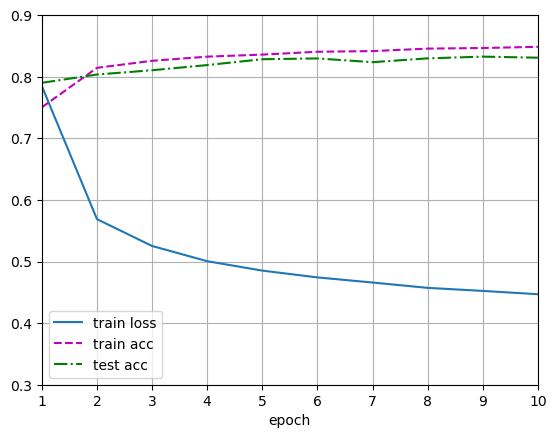

In [18]:
num_epochs = 10
train(net, train_iter, test_iter, \
      cross_entroy, num_epochs, updater)

## 预测
---

In [19]:
def get_fashion_mnist_labels(labels):
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal','shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [20]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """绘制图像列表"""
    figsize = (num_cols*scale, num_rows*scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.numpy() if torch.is_tensor(img) else img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles is not None:
            ax.set_title(titles[i])
    return axes

In [21]:
def predict(net, test_iter, n=6):
    """预测标签"""
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

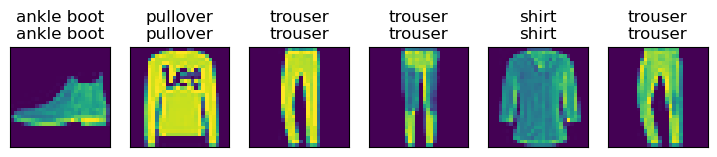

In [22]:
predict(net, test_iter)

## Exercises
---

1. 本节直接实现了基于数学定义softmax运算的softmax函数。这可能会导致什么问题？提示：尝试计算$exp(50)$的大小

2. 本节中的函数cross_entropy是根据交叉熵损失函数的定义实现的。它可能有什么问题？提示：考虑对数的定义域

3. 请想一个解决方案来解决上述两个问题

4. 返回概率最大的分类标签总是最优解吗？例如，医疗诊断场景下可以这样做吗?

5. 假设我们使用softmax回归来预测下一个单词，可选取的单词数目过多可能会带来哪些问题?